In [ ]:
from datetime import datetime

import pandas as pd
import numpy as np

import codecs, json 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

import xgboost as xgb

from sklearn.metrics import mean_squared_error

import scipy

In [2]:
######################### METHODS ###################################

In [4]:
def parse_data(filename):
    with open(filename) as json_file:
        json_data = json.load(json_file)
    
    frames = []
    for j in range(len(json_data['tables'])):
        df = pd.DataFrame(np.array(json_data['tables'][j]['table'])[:,:], 
                           columns = json_data['tables'][j]['header']['variables'][:])
        df['state'] = json_data['tables'][j]['header']['flightphase']
        if df['state'][0] == 'cruise':
            frames.append(df)
    
    df = pd.concat(frames,ignore_index=True)
    return df

In [5]:
def getInterpolation(temp, alt, mass, speed, objective, filename):
    df = parse_data(filename)
    df = df[['DISA','ALTITUDE','MASS','MACH', objective]]
    
    test = pd.concat([temp, alt, mass, speed, objective])
    df.append(test) # where to place points? or does not matter... (see previous tests)
    
    return ((df.interpolate()).iloc[test.index.values])[objective]
    

In [ ]:
####################################################################

In [7]:
with open('/Users/Navid/Documents/MPENM/Project Course /Python/data_rich_ac') as json_file:
    json_data = json.load(json_file)

In [8]:
# json_data is a disc 
# The tables is a list and header is dict
# The tables list contains dict -> This dict contains the data
#json_data['tables'][1]['table']


In [20]:
frames = []
for j in range(len(json_data['tables'])):
    df = pd.DataFrame(np.array(json_data['tables'][j]['table'])[:,:], 
                           columns = json_data['tables'][j]['header']['variables'][:])
    df['state'] = json_data['tables'][j]['header']['flightphase']
    if df['state'][0] == 'cruise':
        frames.append(df)
    
df = pd.concat(frames,ignore_index=True)
df = df[['DISA','ALTITUDE','MASS','MACH','FUELFLOW']]

In [81]:
X = df.drop(['FUELFLOW'], axis=1)
y = df.FUELFLOW

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.insert(4, 'FUELFLOW', y_train, False)
X = X_train.append(X_test)
X = X.sort_index(axis=0)

In [ ]:
#X_inter = X.interpolate()
#X_inter
interpolate = scipy.interpolate.LinearNDInterpolator(X_train, y_train)

In [91]:
X_inter['type'] = 0
X_inter.loc[X_test.index.values, 'type'] = 1
X_inter['y_test'] = y_test
X_inter

,ALTITUDE,DISA,FUELFLOW,MACH,MASS,type,y_test
0,0.0,-30.0,0.231023,0.345534,39000.000,0,NaN
1,0.0,-30.0,0.242427,0.351389,44000.000,0,NaN
2,0.0,-30.0,0.257452,0.361062,49000.000,0,NaN
3,0.0,-30.0,0.273658,0.370924,54000.000,0,NaN
4,0.0,-30.0,0.290586,0.380586,59000.000,0,NaN
...,...,...,...,...,...,...,...
78845,39000.0,30.0,0.252554,0.740000,53380.024,1,0.289282
78846,39800.0,30.0,0.234343,0.740000,39000.000,0,NaN
78847,39800.0,30.0,0.249693,0.740000,44000.000,0,NaN
78848,39800.0,30.0,0.269108,0.740000,49000.000,0,NaN


In [84]:
y_inter = (X_inter.iloc[X_test.index.values])['FUELFLOW']

mean_squared_error(y_test,y_inter)

0.001015410746677203

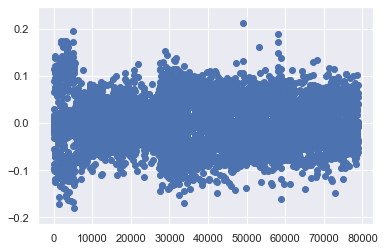

In [85]:
residual = y_inter-y_test
res_plot = residual.reset_index()

plt.scatter(residual.index, residual)

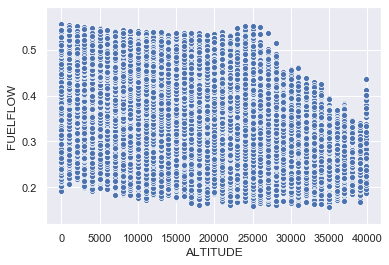

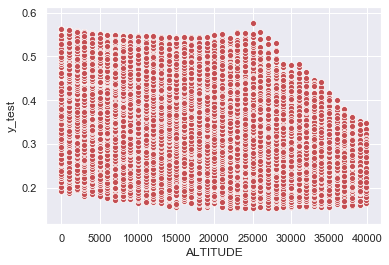

In [98]:
sns.scatterplot(x='ALTITUDE',y='FUELFLOW', data=X_inter[X_inter.type==1],color='b')
plt.show()

sns.scatterplot(x='ALTITUDE',y='y_test', data=X_inter[X_inter.type==1],color='r')

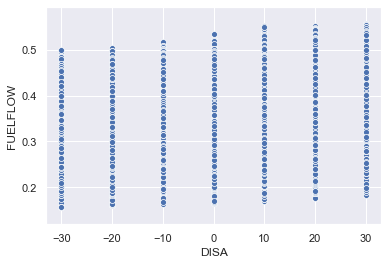

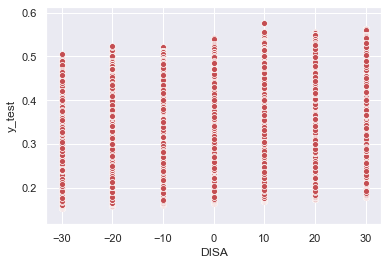

In [99]:
sns.scatterplot(x='DISA',y='FUELFLOW', data=X_inter[X_inter.type==1],color='b')
plt.show()

sns.scatterplot(x='DISA',y='y_test', data=X_inter[X_inter.type==1],color='r')

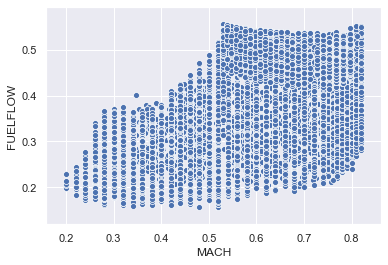

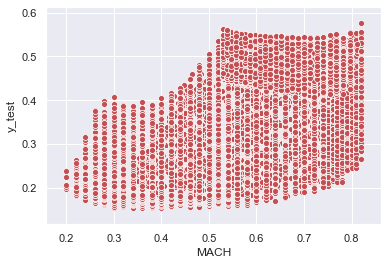

In [100]:
sns.scatterplot(x='MACH',y='FUELFLOW', data=X_inter[X_inter.type==1],color='b')
plt.show()

sns.scatterplot(x='MACH',y='y_test', data=X_inter[X_inter.type==1],color='r')

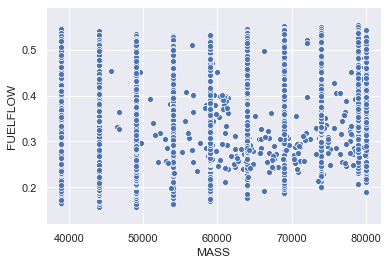

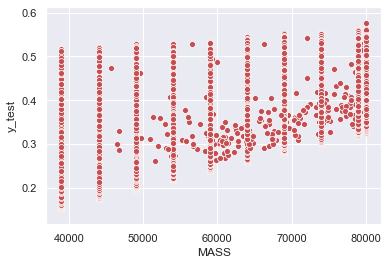

In [101]:
sns.scatterplot(x='MASS',y='FUELFLOW', data=X_inter[X_inter.type==1],color='b')
plt.show()

sns.scatterplot(x='MASS',y='y_test', data=X_inter[X_inter.type==1],color='r')